In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
from fastai.vision.all import *
import torch
import skimage
import torch.nn.functional as F
from PIL import Image

In [3]:
def cambio_funcion_activacion(model, anterior, nueva):
    for child_name, child in model.named_children():
        if isinstance(child, type(anterior)):
            setattr(model, child_name, nueva)
        else:
            cambio_funcion_activacion(child, anterior, nueva)

In [4]:
path = Path('/home/yani/Pruebas TFG/DatasetConIncorrectas/Tipo3Oversampling/Completo')
dls = ImageDataLoaders.from_folder(path, train='train', valid='valid', bs=9, seed=41)

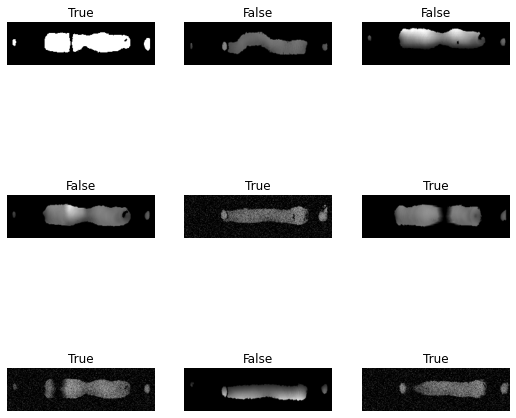

In [5]:
dls.show_batch()

In [6]:
precision = Precision()
f1 = F1Score()

In [7]:
learn = cnn_learner(dls, models.resnet34,normalize=True,pretrained=True,
                    metrics=[accuracy, precision, f1],opt_func=SGD)

In [8]:
learn.summary()

Sequential (Input shape: 9)
Layer (type)         Output Shape         Param #    Trainable 
                     9 x 64 x 35 x 120   
Conv2d                                    9408       False     
BatchNorm2d                               128        True      
ReLU                                                           
MaxPool2d                                                      
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
ReLU                                                           
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
ReLU                                                           
Conv2d                                    36864      False     
BatchNorm2d                       

In [9]:
cambio_funcion_activacion(learn.model, nn.ReLU(),nn.Tanh())

In [10]:
print(learn.model)

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): Tanh()
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): Tanh()
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): Tanh()
   

SuggestedLRs(lr_min=0.004786301031708717, lr_steep=7.585775847473997e-07)

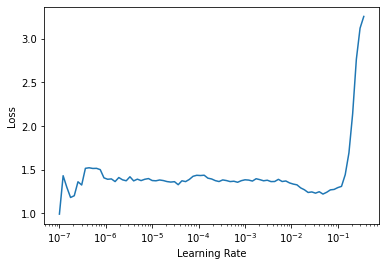

In [11]:
learn.lr_find()

In [12]:
learn.fit(6, lr=1e-3)

epoch,train_loss,valid_loss,accuracy,precision_score,f1_score,time
0,0.487487,0.733565,0.654286,0.925197,0.492662,00:34
1,0.400536,0.574124,0.754286,0.888646,0.702936,00:34
2,0.466444,0.538625,0.767143,0.930876,0.712522,00:34
3,0.414304,0.477895,0.789286,0.943107,0.745030,00:34
4,0.342137,0.390516,0.805714,0.889091,0.782400,00:34
5,0.296038,0.389545,0.815714,0.931641,0.787129,00:34


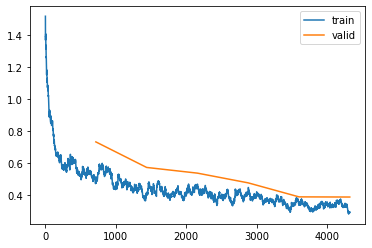

In [13]:
learn.recorder.plot_loss()

In [14]:
learn.freeze()

SuggestedLRs(lr_min=6.309573450380412e-08, lr_steep=1.5848931980144698e-06)

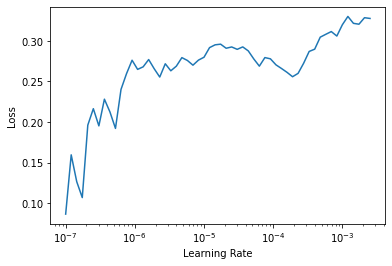

In [15]:
learn.lr_find()

In [16]:
learn.fine_tune(2)

epoch,train_loss,valid_loss,accuracy,precision_score,f1_score,time
0,0.305916,0.352054,0.830000,0.870192,0.820242,00:33


epoch,train_loss,valid_loss,accuracy,precision_score,f1_score,time
0,0.331221,0.406116,0.797857,0.937107,0.759558,00:49
1,0.302105,0.322748,0.845714,0.924561,0.829921,00:50


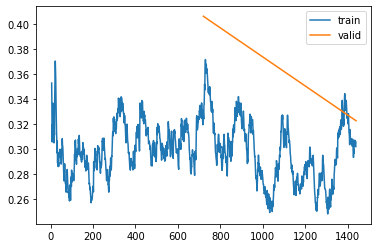

In [17]:
learn.recorder.plot_loss()

In [18]:
learn.fine_tune(5)

epoch,train_loss,valid_loss,accuracy,precision_score,f1_score,time
0,0.323252,0.327021,0.845714,0.932143,0.828571,00:36


epoch,train_loss,valid_loss,accuracy,precision_score,f1_score,time
0,0.293008,0.660999,0.722143,0.972644,0.621963,00:50
1,0.307370,0.325813,0.855714,0.788194,0.870844,00:50
2,0.268099,0.362787,0.827857,0.965517,0.797988,00:50
3,0.249897,0.295717,0.860000,0.943662,0.845426,00:50
4,0.254041,0.268182,0.872143,0.934891,0.862202,00:50


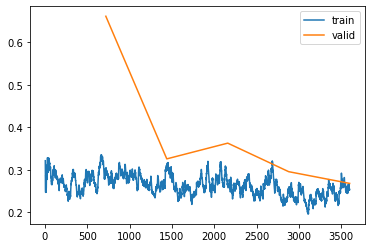

In [19]:
learn.recorder.plot_loss()

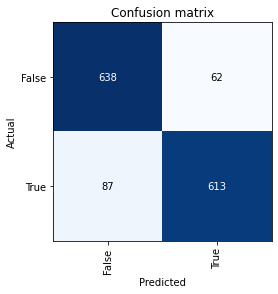

In [25]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()